In [114]:
import numpy as np
import pandas as pd
import sklearn as sk
import random

# Step1. Data upload

In [115]:
train=pd.read_csv("./train.csv")

In [116]:
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


## step1.1 pick duplicate questions

In [117]:
target=train[train["is_duplicate"]==1]
target

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...,...
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [118]:
target.reset_index(drop=True,inplace=True)

In [119]:
target

,id,qid1,qid2,question1,question2,is_duplicate
0,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
1,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
2,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
3,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
4,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...,...
149258,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
149259,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
149260,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
149261,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


## step1.2 pick 10 sets

In [120]:
# pick 10 sets
sampleList = random.sample(range(len(target)), 10)
sampleList

[53743, 35311, 57904, 40885, 44176, 13155, 126613, 27689, 61085, 97352]

In [121]:
datapd=target.loc[sampleList]
datapd

,id,qid1,qid2,question1,question2,is_duplicate
53743,144281,228392,228393,Why C++ is not considered as pure Object Orien...,Why we say that C++ is not purely object orien...,1
35311,94897,158386,158387,What are some of the most amazing photographs ...,What are some of the most amazing photographs ...,1
57904,155515,65240,126963,Which are the best books for iit jam mathematics?,What are the best books for IIT-JAM mathematics?,1
40885,109892,2438,30022,How can I improve my pronunciation in English?,How can I improve my communication skills in E...,1
44176,118715,21592,180892,Can long distance relationships work out?,Is there a single case of a successful long di...,1
13155,35286,64508,64509,What are the best Android games of all time wi...,What are some best android games to play?,1
126613,340754,304132,112304,Who is Jake Williams and why is he getting so ...,Why is Jake Williams idolised so much?,1
27689,74326,33612,127399,Why do people continue to support Donald Trump...,Who are the people still choosing to vote for ...,1
61085,164044,255001,134550,How do I get a job at Intel?,How can I get a job at intel?,1
97352,261807,378016,378017,Can you tell me your secrets?,Will you tell me a secret?,1


In [122]:
datapd.iloc[9]["question1"]

'Can you tell me your secrets?'

# Step2. make Corpus/shingling vocab/Shingles base_matrix

## Step2.1 make corpus & eliminate stop words

In [123]:
# make Question corpus
# without stop word
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jihoonan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:

corpus=[]
for k in range(0,10):
    temp1=datapd.iloc[k]["question1"]
    temp2= datapd.iloc[k]["question2"]
    
    tokenized_temp1=temp1.split()
    tokenized_temp2=temp2.split()
    temp1_wo_stop = [word for word in tokenized_temp1 if not word in stopwords.words()]
    temp2_wo_stop = [word for word in tokenized_temp2 if not word in stopwords.words()]
    temp1_final=' '.join(temp1_wo_stop)
    temp2_final=' '.join(temp2_wo_stop)
    corpus.append(temp1_final)
    corpus.append(temp2_final)

corpus




['Why C++ considered pure Object Oriented programming?',
 'Why say C++ purely object oriented programming language?',
 'What amazing photographs astronomy space?',
 'What amazing photographs space?',
 'Which best books iit jam mathematics?',
 'What best books IIT-JAM mathematics?',
 'How I improve pronunciation English?',
 'How I improve communication skills English?',
 'Can long distance relationships work out?',
 'Is single case successful long distance relationship?',
 'What best Android games time great graphics?',
 'What best android games play?',
 'Who Jake Williams getting much famous Quora?',
 'Why Jake Williams idolised much?',
 "Why people continue support Donald Trump even though he's inconsistent?",
 "Who people still choosing vote Donald Trump vote (other he's Republican nominee)?",
 'How I get job Intel?',
 'How I get job intel?',
 'Can tell secrets?',
 'Will tell secret?']

## Step2.2 5-gram Shingling vocab

In [158]:
#set hyper parameter
k=9
#every shingling vocab in dictionary
dictionary=[]
for q in range(len(corpus)):
    # string을 k-gram 리스트로 만들기. + dictionary에 추가하기
    dictionary=dictionary+list(map(''.join,zip(*[corpus[q][i:] for i in range(k)])))

# in order to eliminate 중복
dictionary=set(dictionary)
dictionary=list(dictionary)

## step2.3 Shingles base_matrix

In [159]:
shingles_base_matrix=np.zeros((len(dictionary),len(corpus)))
for q in range(len(corpus)):
    gramk=list(map(''.join,zip(*[corpus[q][i:] for i in range(k)])))
    gramklist=[]
    for p in gramk:
        gramklist.append(dictionary.index(p))
    for t in gramklist:
        shingles_base_matrix[t][q]=1
print(shingles_base_matrix)
        

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [160]:
shingles_base_matrix.shape

(546, 20)

# Step3. Implement  Min-hashing

In [161]:
import random
def min_hash(base_matrix,hashing_time):
    row=base_matrix.shape[0]
    col=base_matrix.shape[1]
    rowidxlist=list(range(row))
    signatures_matrix=np.zeros((hashing_time,col))
    for k in range(hashing_time):
        random.shuffle(rowidxlist)
        for j in range(col):
            for i in range(len(rowidxlist)):
                targetrow=rowidxlist.index(i)
                if base_matrix[targetrow,j]==1:
                    signatures_matrix[k,j]=i
                    break
                else:
                    continue
    return signatures_matrix


## 잘못 구현
# def isPrime(n):
#     if n==2 or n==3: return True
#     if n%2==0 or n<2: return False
#     for i in range(3, int(n**0.5)+1, 2):   # only odd numbers
#         if n%i==0:
#             return False    

#     return True


# def min_hash(base_matrix,hashing_time):
#     row=base_matrix.shape[0]
#     col=base_matrix.shape[1]
#     rowlist=[_ for _ in range(row)]
#     signatures_matrix=np.zeros((hashing_time,col))
#     for p in range(hashing_time):
#         #random.seed(hashing_time)
#         a= random.randrange(1, row)
#         b= random.randrange(1, row)
#         c=row
#         while True:
#             if (isPrime(c)):
#                 break
#             else:
#                 c+=1
#         hashedrowlist=[]
#         for q in rowlist:
#             hashedrowlist.append((a*q+b)%c)

#         for j in range(col):
#             for i in range(len(hashedrowlist)):
#                 targetrow=hashedrowlist.index(i)
#                 if base_matrix[targetrow,j]==1:
#                     signatures_matrix[p,j]=i
#                     break
#                 else:
#                     continue
#     return signatures_matrix   

In [162]:
signatures_matrix=min_hash(shingles_base_matrix,10)
print(signatures_matrix)
print(signatures_matrix.shape)

[[  6.   2.   3.  22.   0.  53.  16.  12.  28.   1.   7.   5.  18.  88.
   25.   9.  19.  19.  37.  37.]
 [  2.  19.  16.  16.   9.  37.  23.  40.  25.   4.  13.  45.   0.   6.
    8.   3.  18.  18.  22.  35.]
 [  6.  24.  22.  17.   4.   5.  36.   9.   0.   3.   5.   5.  43.  21.
    1.  25.   7.   7.   2.  14.]
 [ 13.   3.   6.  16.   0.  26.   7.   2.  18.  10.  38.  35.  17.  29.
    4.   1.  40.  40.  19.  51.]
 [  5.  14.   0.   0.  44.   8.   2.   1.   4.   6.  35.  35.   7.  10.
   19.   3. 110.  65.  61.  88.]
 [ 35.   4.   0.   2.  13.   1.   6.  11.  30.  32.  19.   8.  16.  16.
    9.   3.  21.  21. 125.  61.]
 [  9.   8.   7.  15.  37.  19.  25.  89.   5.   4.   1.   6.   0.  45.
   12.   3.  52.  52.  31.  28.]
 [  3.   3.  17.  28.   7.   7. 116.  19.  10.  10.   0.  40.   1.   1.
    6.   9.  16.  41.   5. 115.]
 [  0.   1.   4.   4.   2.  11.  85.   7.  35.   3.  33.  61.   6.  32.
   15.   8.  82. 101.  31.  31.]
 [ 10.   2.   4.  33.   7.  22.  17.  13.   9.   0.  19

# Step 4 Evaluate min-Hashing

## Step4.1 make jaccard similarity value and mean

In [163]:
from sklearn.metrics import jaccard_score
def eval_jaccard_sim_shingles(target_matrix):
    row=target_matrix.shape[0]
    col=target_matrix.shape[1]
    jaccard_score_list=[]
    for k in range(col//2):
        jaccard_score_list.append(jaccard_score(target_matrix[:,2*k],target_matrix[:,(2*k)+1],average='binary'))
    
    return jaccard_score_list
    

def eval_jaccard_sim_signatures(target_matrix):
    row=target_matrix.shape[0]
    col=target_matrix.shape[1]
    jaccard_score_list=[]
    for k in range(col//2):
        jaccard_score_list.append(jaccard_score(target_matrix[:,2*k],target_matrix[:,(2*k)+1],average='micro'))
    
    return jaccard_score_list
    

In [164]:
_1=eval_jaccard_sim_signatures(signatures_matrix)

In [165]:
_2=eval_jaccard_sim_shingles(shingles_base_matrix)

In [166]:
gaptemp=[]
for k in range(len(_2)):
    temp=_2[k]-_1[k]
    temp=abs(temp)
    gaptemp.append(temp)
ans= sum(gaptemp)/len(gaptemp)
ans
    

0.12377168437319305

## Step4.2 change hashnum

In [167]:
gaplist=[]
for k in range(1,200):
    signatures_matrix=min_hash(shingles_base_matrix,k)
    _1=eval_jaccard_sim_signatures(signatures_matrix)
    _2=eval_jaccard_sim_shingles(shingles_base_matrix)
    gaptemp=[]
    for k in range(len(_2)):
        temp=_2[k]-_1[k]
        temp=abs(temp)
        gaptemp.append(temp)
    ans= sum(gaptemp)/len(gaptemp)
    gaplist.append(ans)
    

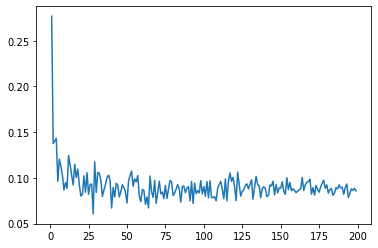

In [168]:
from matplotlib import pyplot as plt
x_values = [k for k in range(1,200)]
y_values=gaplist

plt.plot(x_values, y_values)
#plt.plot(x_values, y_values_2)
plt.show()

# Step 5. scale up! ->100 pair questions

In [79]:
# pick 100 sets
sampleList = random.sample(range(len(target)), 100)
print(len(sampleList))

100


In [80]:
datapd=target.loc[sampleList]
datapd

,id,qid1,qid2,question1,question2,is_duplicate
77051,206925,310476,310477,Should I be ashamed of being American? Why or ...,Should I be ashamed of being American?,1
105923,285128,118723,224360,Are aliens demons?,Fallen Angels: Does the Bible view aliens as d...,1
11003,29588,54728,54729,How do we write blogs?,How should I start writing blogs?,1
97701,262720,379114,13560,What is the best first car?,What would be a good first car?,1
94665,254523,369269,369270,Is the practice manual of ISCA sufficient for ...,Is practice manual of isca sufficient for CA f...,1
...,...,...,...,...,...,...
101490,273146,391562,391563,What are some differences between healthy cell...,How do cancer cells differ from normal cells?,1
24321,65195,113181,113182,What if you become a prime minister for a day?,"If you could become prime minister for a day, ...",1
145278,392569,127573,119968,Why did the US attack Iraq?,Why did the USA attack & destroy Iraq?,1
132002,355260,484476,484477,Is Bhutan an Indian protectorate?,Is Bhutan an Indian protectorate? If not why B...,1


In [81]:

corpus=[]
for k in range(0,100):
    temp1=datapd.iloc[k]["question1"]
    temp2= datapd.iloc[k]["question2"]
    
    tokenized_temp1=temp1.split()
    tokenized_temp2=temp2.split()
    temp1_wo_stop = [word for word in tokenized_temp1 if not word in stopwords.words()]
    temp2_wo_stop = [word for word in tokenized_temp2 if not word in stopwords.words()]
    temp1_final=' '.join(temp1_wo_stop)
    temp2_final=' '.join(temp2_wo_stop)
    corpus.append(temp1_final)
    corpus.append(temp2_final)
corpus





['Should I ashamed American? Why not?',
 'Should I ashamed American?',
 'Are aliens demons?',
 'Fallen Angels: Does Bible view aliens demons?',
 'How write blogs?',
 'How I start writing blogs?',
 'What best first car?',
 'What would good first car?',
 'Is practice manual ISCA sufficient CA final exam?',
 'Is practice manual isca sufficient CA final exam Nov 2016?',
 'What best programming languages learn today?',
 'What would best programming language DIY learn today?',
 'How slope indifference curve determined?',
 'How slope indifference curve determined?',
 'What ur opinion pre marital sex?',
 'Is pre marital sex wrong ?',
 'How I add pictures Quora?',
 'How I add photos questions Quora?',
 'How I improve pronunciation English?',
 'How I become good English?',
 'Somewhere heard Taj mahal Hindu temple. Is true?',
 'Was Taj Mahal Shiva temple?',
 'What story behind name?',
 'What’s meaning name?',
 'What best dual monitor setup MacBook Pro Retina Display?',
 'What best monitors use du

In [82]:
#set hyper parameter
k=5
#every shingling vocab in dictionary
dictionary=[]
for q in range(len(corpus)):
    # string을 k-gram 리스트로 만들기. + dictionary에 추가하기
    dictionary=dictionary+list(map(''.join,zip(*[corpus[q][i:] for i in range(k)])))

# eliminate 중복
dictionary=set(dictionary)
dictionary=list(dictionary)

In [83]:
shingles_base_matrix=np.zeros((len(dictionary),len(corpus)))
for q in range(len(corpus)):
    gramk=list(map(''.join,zip(*[corpus[q][i:] for i in range(k)])))
    gramklist=[]
    for p in gramk:
        gramklist.append(dictionary.index(p))
    for t in gramklist:
        shingles_base_matrix[t][q]=1
print(shingles_base_matrix)
        

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]


In [84]:
shingles_base_matrix.shape

(3849, 200)

In [85]:
import random
def min_hash(base_matrix,hashing_time):
    row=base_matrix.shape[0]
    col=base_matrix.shape[1]
    rowidxlist=list(range(row))
    signatures_matrix=np.zeros((hashing_time,col))
    for k in range(hashing_time):
        random.shuffle(rowidxlist)
        for j in range(col):
            for i in range(len(rowidxlist)):
                targetrow=rowidxlist.index(i) 
                if base_matrix[targetrow,j]==1:
                    signatures_matrix[k,j]=i
                    break
                else:
                    continue
    return signatures_matrix
            
        

In [86]:
signatures_matrix=min_hash(shingles_base_matrix,k)
print(signatures_matrix)
print(signatures_matrix.shape)

[[1.60e+02 1.60e+02 3.85e+02 1.63e+02 2.57e+02 1.68e+02 1.21e+02 5.50e+01
  1.50e+02 1.50e+02 5.80e+01 5.50e+01 7.60e+01 7.60e+01 1.51e+02 5.20e+01
  1.38e+02 2.47e+02 5.30e+01 2.69e+02 2.30e+01 8.30e+01 3.07e+02 2.15e+02
  5.60e+01 1.21e+02 1.05e+02 1.05e+02 3.70e+01 3.70e+01 8.70e+01 8.70e+01
  4.88e+02 6.00e+01 1.66e+02 1.66e+02 1.12e+02 1.87e+02 2.33e+02 1.10e+01
  4.60e+01 1.50e+01 2.85e+02 2.90e+02 1.23e+02 1.43e+02 1.00e+00 1.00e+00
  2.13e+02 4.30e+02 2.71e+02 4.91e+02 1.70e+01 1.70e+01 2.77e+02 2.77e+02
  2.20e+02 2.14e+02 1.95e+02 1.55e+02 2.20e+01 2.20e+01 1.84e+02 3.50e+02
  1.36e+02 1.21e+02 3.70e+01 3.70e+01 1.29e+02 3.20e+01 5.10e+01 1.21e+02
  3.48e+02 3.20e+01 3.60e+01 3.60e+01 8.40e+01 6.10e+01 5.00e+00 1.56e+02
  1.70e+01 1.70e+01 7.30e+01 2.60e+01 5.41e+02 1.83e+02 2.00e+00 3.30e+01
  1.59e+02 1.59e+02 3.96e+02 1.52e+02 3.50e+01 1.20e+01 1.90e+01 1.02e+02
  3.84e+02 2.28e+02 2.92e+02 1.10e+02 1.21e+02 3.29e+02 2.70e+01 2.60e+02
  1.30e+01 1.32e+02 3.40e+01 3.40e+01 

In [87]:
from sklearn.metrics import jaccard_score
def eval_jaccard_sim_shingles(target_matrix):
    row=target_matrix.shape[0]
    col=target_matrix.shape[1]
    jaccard_score_list=[]
    for k in range(col//2):
        jaccard_score_list.append(jaccard_score(target_matrix[:,2*k],target_matrix[:,(2*k)+1],average='binary'))
    
    return jaccard_score_list
    

def eval_jaccard_sim_signatures(target_matrix):
    row=target_matrix.shape[0]
    col=target_matrix.shape[1]
    jaccard_score_list=[]
    for k in range(col//2):
        jaccard_score_list.append(jaccard_score(target_matrix[:,2*k],target_matrix[:,(2*k)+1],average='micro'))
    
    return jaccard_score_list
    

In [88]:
_1=eval_jaccard_sim_signatures(signatures_matrix)

In [89]:
_2=eval_jaccard_sim_shingles(shingles_base_matrix)

In [90]:
gaptemp=[]
for k in range(len(_2)):
    temp=_2[k]-_1[k]
    temp=abs(temp)
    gaptemp.append(temp)
ans= sum(gaptemp)/len(gaptemp)
ans
    

0.1621638208125287

In [91]:
gaplist=[]
for k in range(1,50):
    signatures_matrix=min_hash(shingles_base_matrix,k)
    _1=eval_jaccard_sim_signatures(signatures_matrix)
    _2=eval_jaccard_sim_shingles(shingles_base_matrix)
    gaptemp=[]
    for k in range(len(_2)):
        temp=_2[k]-_1[k]
        temp=abs(temp)
        gaptemp.append(temp)
    ans= sum(gaptemp)/len(gaptemp)
    gaplist.append(ans)
    
    

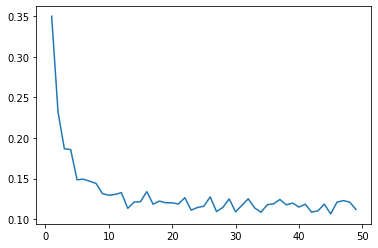

In [92]:
from matplotlib import pyplot as plt
x_values = [k for k in range(1,50)]
y_values=gaplist

plt.plot(x_values, y_values)
#plt.plot(x_values, y_values_2)
plt.show()